# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [50]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [8]:
print(df_raw.count())
print(df_raw.shape)

admit       400
gre         398
gpa         398
prestige    399
dtype: int64
(400, 4)


Answer: There are 400 observations. 

#### Question 2. Create a summary table

In [9]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a larger STD than GPA because the range of values is larger. GPA has a minimum of 2.26 and a maximum of 4.0, so the STD would have to be between those values. GRE is ranging from 220 to 800, which leaves a much larger gap for values, leading to a larger STD.

#### Question 4. Drop data points with missing data


In [10]:
df_nonull = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [15]:
print(df_nonull[df_nonull['admit'].isnull()]['admit'].count())
print(df_nonull[df_nonull['gre'].isnull()]['gre'].count())
print(df_nonull[df_nonull['gpa'].isnull()]['gpa'].count())
print(df_nonull[df_nonull['prestige'].isnull()]['prestige'].count())
print(df_nonull.count())

0
0
0
0
admit       397
gre         397
gpa         397
prestige    397
dtype: int64


Answer: Each individual row has a count of 0 for null values. You can also see using the count function that each row has the same number of values (397). This is different from the original count in question 1, where there are a different number of entries in each column. 

#### Question 6. Create box plots for GRE and GPA

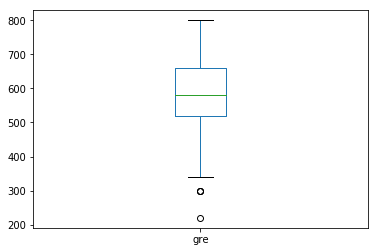

In [16]:
#boxplot 1
df_nonull.gre.plot(kind = 'box')

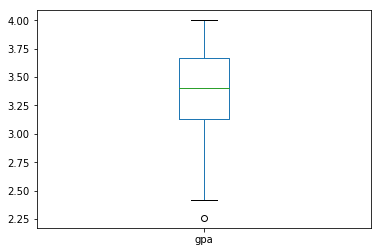

In [17]:
#boxplot 2 
df_nonull.gpa.plot(kind = 'box')

#### Question 7. What do this plots show?

In [18]:
df_nonull.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: The box plots show the distribution of data for the GRE and GPA columns, using five points from the data: median, minimum, maxiumum, and the 25% and 75% quartiles. You can see that these values in the summary table above correspond to the lines on the box plots. There is a difference with the minimum however, because the box plots have searched for outliers and not counted them as part of the data. 

#### Question 8. Describe each distribution 

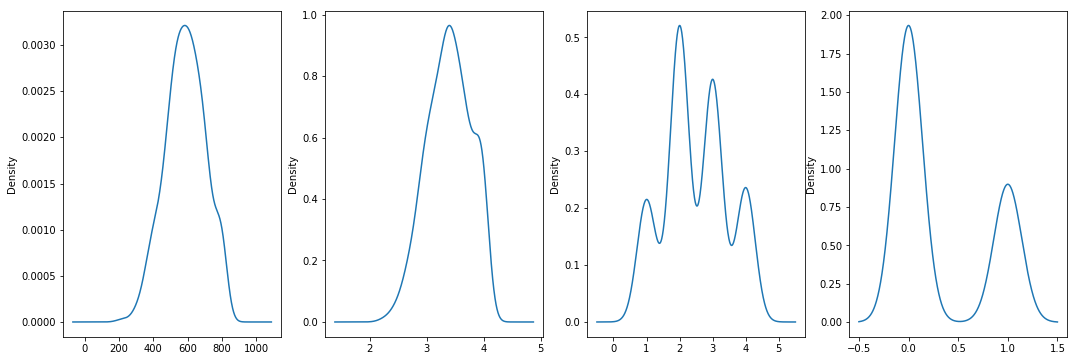

In [43]:
# plot the distribution of each variable 
fig, axs = plt.subplots(1, 4, sharey=False)
df_nonull.gre.plot(kind = "density", x = 'GRE', ax = axs[0], figsize = (18, 6))
df_nonull.gpa.plot(kind = "density", x = 'GPA', ax = axs[1])
df_nonull.prestige.plot(kind = "density", x = 'Prestige', ax = axs[2])
df_nonull.admit.plot(kind = "density", x = 'Admit', ax = axs[3])

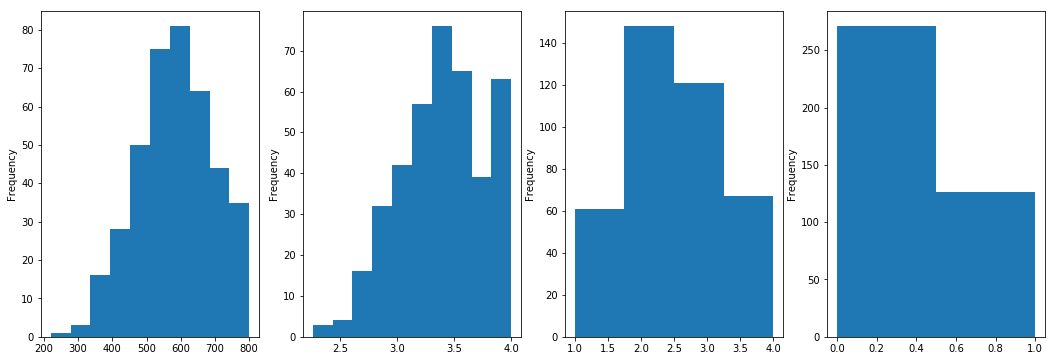

In [45]:
fig, axs = plt.subplots(1, 4, sharey=False)
df_nonull.gre.plot(kind = "hist", x = 'GRE', ax = axs[0], figsize = (18, 6))
df_nonull.gpa.plot(kind = "hist", x = 'GPA', ax = axs[1])
df_nonull.prestige.plot(kind = "hist", x = 'Prestige', ax = axs[2], bins = 4)
df_nonull.admit.plot(kind = "hist", x = 'Admit', ax = axs[3], bins = 2)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [46]:
df_nonull.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

In [47]:
df_nonull.kurt()

admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64

Answer: GRE and GPA appear to have a near normal distrubution. You can see this in the density plots, and they also have small skew and kurtosis values. Prestige also looks to be close to normal, as it has small kurtosis and skew. It also looks normal in its histogram, but it is hard to tell with the density plot since it only can have 4 distinct values. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: I do not think that the distribution needs to be corrected. 

#### Question 11. Which of our variables are potentially colinear? 

               gre       gpa  prestige     admit
gre       1.000000  0.382408 -0.124533  0.181202
gpa       0.382408  1.000000 -0.060976  0.174116
prestige -0.124533 -0.060976  1.000000 -0.243563
admit     0.181202  0.174116 -0.243563  1.000000
Axes(0.125,0.125;0.62x0.755)


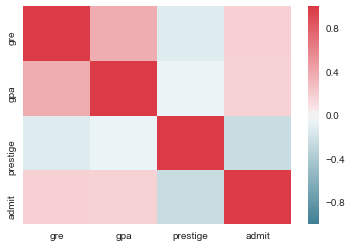

In [54]:
# create a correlation matrix for the data
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df_nonull[['gre', 'gpa', 'prestige', 'admit']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

#### Question 12. What did you find?

Answer: GRE and GPA are moderately correlated to each other. Admit is only slightly correlated to both GRE and GPA, and it seems that prestige has a small negative correlation with GRE, GPA, and admit. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:  I will be investigating the association between grad school admission rates and the prestige of undergraduate schools using linear regression. Linear regresssion is an appropriate method as we are trying to determine the effect of one variable on another. For linear regression, I will be working with an equation in the form of y = mx + b, where m will be the coefficient, and b will be the intercept. The independent and dependent variables are x and y respectively. I will assess the association by looking at values such as the the confidence intervales, P value, and R squared value. I will also look at scatter plots to visualize the linear relationship. 

#### Question 14. What is your hypothesis? 

Answer: The null hypothesis is that there is no association between prestige of undergraduate schools and grad school admission rates. The alternative hypothesis is that there is an associate between the two.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

We could use .fillna to insert missing data. Using this command, we could fill the missing data with a certain value, which could even be the mean of each particular column. We could also propagate non-null values forwards or backwards using the "pad" method. There is also an option to use a .interpolate() method to interpolate values at missing data points using various methods. 

#### 2. Bonus: Log transform the skewed data

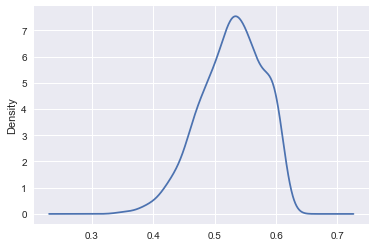

In [59]:
log_gpa = df_nonull.gpa.apply(np.log10)
log_gpa.plot(kind = "density")

#### 3. Advanced: Impute missing data

In [60]:
df_missing_mean = df_raw.fillna(df_raw.mean())

In [61]:
df_missing_interp = df_raw.interpolate()